# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
file_path = "Dataset_inisiasi.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,3


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Menghapus kolom yang tidak relevan
df_cleaned = df.drop(columns=["TransactionID", "AccountID", "DeviceID", "IP Address",
                              "MerchantID", "PreviousTransactionDate", "TransactionDate", "CustomerOccupation"])

# Encoding fitur kategorikal
categorical_cols = ["Location", "Channel", "TransactionType"]
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])

In [5]:
# Memisahkan fitur dan target
X = df_cleaned.drop(columns=["Cluster"]) # Fitur
y = df_cleaned["Cluster"] # Target

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   int64  
 2   Location             2512 non-null   int64  
 3   Channel              2512 non-null   int64  
 4   CustomerAge          2512 non-null   int64  
 5   TransactionDuration  2512 non-null   int64  
 6   LoginAttempts        2512 non-null   int64  
 7   AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 157.1 KB


In [7]:
print(df_cleaned.dtypes)

TransactionAmount      float64
TransactionType          int64
Location                 int64
Channel                  int64
CustomerAge              int64
TransactionDuration      int64
LoginAttempts            int64
AccountBalance         float64
Cluster                  int64
dtype: object


In [8]:
df_numeric = df_cleaned.select_dtypes(include=['number'])  # Ambil hanya kolom numerik

In [9]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   int64  
 2   Location             2512 non-null   int64  
 3   Channel              2512 non-null   int64  
 4   CustomerAge          2512 non-null   int64  
 5   TransactionDuration  2512 non-null   int64  
 6   LoginAttempts        2512 non-null   int64  
 7   AccountBalance       2512 non-null   float64
 8   Cluster              2512 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 176.8 KB


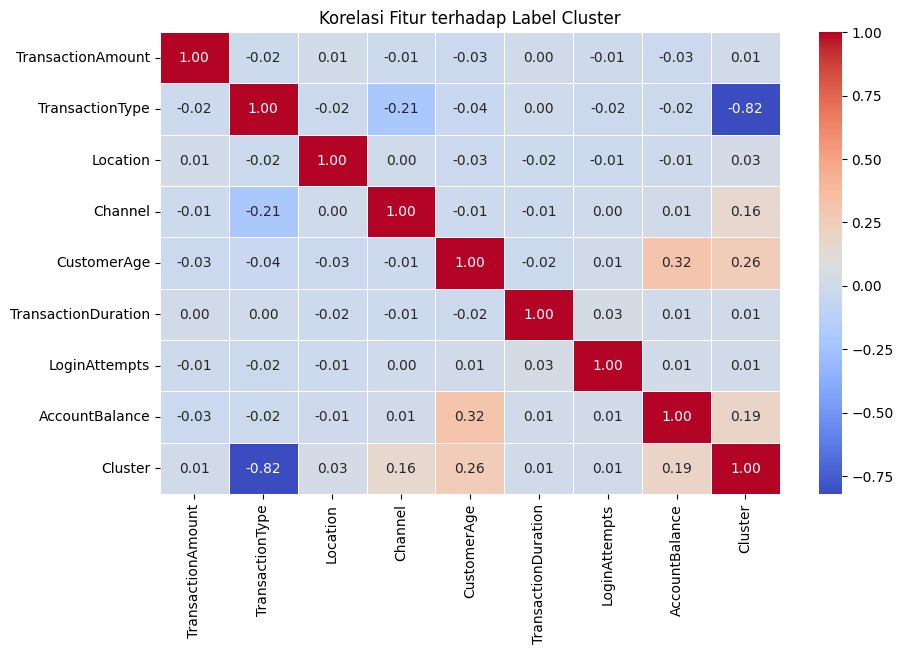

In [10]:
# Menghitung korelasi antara fitur dan label Cluster
correlation_matrix = df_numeric.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi Fitur terhadap Label Cluster")
plt.show()


In [11]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Menampilkan bentuk data setelah preprocessing
X_train.shape, X_test.shape

((2009, 8), (503, 8))

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

### Random Forest

Random Forest adalah algoritma berbasis ensemble learning yang membangun beberapa pohon keputusan (decision trees) dan menggabungkan hasilnya untuk meningkatkan akurasi dan mengurangi overfitting.

- Cara Kerja :
 - Membuat banyak decision tree dari subset acak data dan fitur (bagging).
 - Setiap pohon memberikan hasil prediksi, dan hasil akhir ditentukan melalui voting (klasifikasi).
- Kelebihan :
 - Akurat dan tahan terhadap overfitting.
 - Bisa mengukur feature importance.
 - Cocok untuk data tabular.

In [13]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_train  = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)

### XGBoost

XGBoost adalah algoritma boosting berbasis pohon yang menggunakan teknik gradient boosting untuk membuat model yang kuat dari banyak model lemah (weak learners).
- Cara Kerja :
 - Membangun pohon secara bertahap (berurutan).
 - Masing-masing pohon baru fokus pada kesalahan dari pohon sebelumnya.
 - Optimasi dilakukan dengan fungsi loss dan regularisasi agar tidak overfitting.
- Kelebihan :
 - Performa tinggi, cepat dan efisien.
 - Dapat menangani data imbalance.

In [14]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_test = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:45:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### Random Forest

In [15]:
# Evaluasi TRAIN
rf_train_acc = accuracy_score(y_train, rf_pred_train)
rf_train_f1 = f1_score(y_train, rf_pred_train, average='weighted')
rf_train_precision = precision_score(y_train, rf_pred_train, average='weighted')
rf_train_recall = recall_score(y_train, rf_pred_train, average='weighted')

# Evaluasi TEST
rf_test_acc = accuracy_score(y_test, rf_pred_test)
rf_test_f1 = f1_score(y_test, rf_pred_test, average='weighted')
rf_test_precision = precision_score(y_test, rf_pred_test, average='weighted')
rf_test_recall = recall_score(y_test, rf_pred_test, average='weighted')

print("=== Random Forest ===")
print(classification_report(y_test, rf_pred_test))

print("\nRandom Forest - TRAIN Evaluation")
print(f"Accuracy     : {rf_train_acc:.4f}")
print(f"F1-Score     : {rf_train_f1:.4f}")
print(f"Precision    : {rf_train_precision:.4f}")
print(f"Recall       : {rf_train_recall:.4f}")

print("\nRandom Forest - TEST Evaluation")
print(f"Accuracy     : {rf_test_acc:.4f}")
print(f"F1-Score     : {rf_test_f1:.4f}")
print(f"Precision    : {rf_test_precision:.4f}")
print(f"Recall       : {rf_test_recall:.4f}")

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       102
           1       0.99      1.00      0.99       289
           2       0.98      0.99      0.98        85
           3       0.96      0.93      0.94        27

    accuracy                           0.99       503
   macro avg       0.98      0.97      0.98       503
weighted avg       0.99      0.99      0.99       503


Random Forest - TRAIN Evaluation
Accuracy     : 1.0000
F1-Score     : 1.0000
Precision    : 1.0000
Recall       : 1.0000

Random Forest - TEST Evaluation
Accuracy     : 0.9881
F1-Score     : 0.9880
Precision    : 0.9881
Recall       : 0.9881


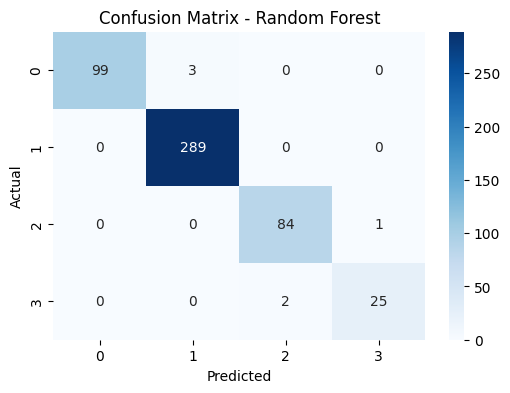

In [16]:
# Confusion Matrix RF
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### XGBoost

In [17]:
# Evaluasi data training
xgb_train_acc = accuracy_score(y_train, xgb_pred_train)
xgb_train_f1 = f1_score(y_train, xgb_pred_train, average='weighted')
xgb_train_precision = precision_score(y_train, xgb_pred_train, average='weighted')
xgb_train_recall = recall_score(y_train, xgb_pred_train, average='weighted')

# Evaluasi data testing
xgb_test_acc = accuracy_score(y_test, xgb_pred_test)
xgb_test_f1 = f1_score(y_test, xgb_pred_test, average='weighted')
xgb_test_precision = precision_score(y_test, xgb_pred_test, average='weighted')
xgb_test_recall = recall_score(y_test, xgb_pred_test, average='weighted')

print("=== XGBoost ===")
print(f"Accuracy: {xgb_acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, xgb_pred_test))

print("XGBoost - TRAIN Evaluation")
print(f"Accuracy     : {xgb_train_acc:.4f}")
print(f"F1-Score     : {xgb_train_f1:.4f}")
print(f"Precision    : {xgb_train_precision:.4f}")
print(f"Recall       : {xgb_train_recall:.4f}")

print("XGBoost - TEST Evaluation")
print(f"Accuracy     : {xgb_test_acc:.4f}")
print(f"F1-Score     : {xgb_test_f1:.4f}")
print(f"Precision    : {xgb_test_precision:.4f}")
print(f"Recall       : {xgb_test_recall:.4f}")

=== XGBoost ===
Accuracy: 0.9920
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       102
           1       0.99      1.00      1.00       289
           2       1.00      0.98      0.99        85
           3       0.93      1.00      0.96        27

    accuracy                           0.99       503
   macro avg       0.98      0.99      0.98       503
weighted avg       0.99      0.99      0.99       503

XGBoost - TRAIN Evaluation
Accuracy     : 1.0000
F1-Score     : 1.0000
Precision    : 1.0000
Recall       : 1.0000
XGBoost - TEST Evaluation
Accuracy     : 0.9920
F1-Score     : 0.9921
Precision    : 0.9923
Recall       : 0.9920


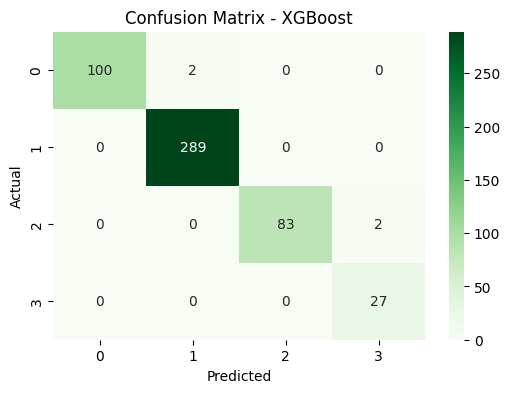

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, xgb_pred_test), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
# Buat dictionary hasil evaluasi
eval_data = {
    "Model": ["Random Forest",  "XGBoost"],
    "Train Accuracy": [rf_train_acc, xgb_train_acc],
    "Train F1-Score": [rf_train_f1, xgb_train_f1],
    "Train Precision": [rf_train_precision, xgb_train_precision],
    "Train Recall": [rf_train_recall, xgb_train_recall],
    "Test Accuracy": [rf_test_acc, xgb_test_acc],
    "Test F1-Score": [rf_test_f1, xgb_test_f1],
    "Test Precision": [rf_test_precision, xgb_test_precision],
    "Test Recall": [rf_test_recall, xgb_test_recall],
}

# Konversi ke DataFrame
eval_df = pd.DataFrame(eval_data)

# Tampilkan DataFrame
pd.set_option('display.precision', 4)
display(eval_df)

,Model,Train Accuracy,Train F1-Score,Train Precision,Train Recall,Test Accuracy,Test F1-Score,Test Precision,Test Recall
0,Random Forest,1.0,1.0,1.0,1.0,0.9881,0.9880,0.9881,0.9881
1,XGBoost,1.0,1.0,1.0,1.0,0.9920,0.9921,0.9923,0.9920


- Akurasi: XGBoost sedikit lebih unggul (99.20%) dibanding Random Forest (98.81%).
- Precision dan Recall: Keduanya menunjukkan nilai tinggi, namun XGBoost memiliki skor yang lebih konsisten di setiap metrik.
- F1-Score: XGBoost juga menunjukkan F1-score yang lebih baik (0.9921), menunjukkan keseimbangan antara precision dan recall yang baik.
- Overfitting: Kedua model menunjukkan performa sangat baik di data training (akurasi 100%), yang bisa menjadi indikasi awal adanya overfitting ringan, namun masih tergolong stabil karena hasil di data uji juga sangat tinggi.
- Kedua model memiliki performa sangat baik.
- XGBoost memberikan hasil evaluasi yang sedikit lebih baik di semua metrik, terutama dalam menangani kelas minoritas (dilihat dari confusion matrix).

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

### Random Forest

In [20]:
# Model dasar
rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# RandomizedSearchCV
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit
rf_search.fit(X_train, y_train)

# Best result
print("Best RF Parameters:", rf_search.best_params_)
rf_best = rf_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best RF Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'class_weight': 'balanced_subsample'}


### XGBoost

In [21]:
# Model dasar
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Param grid
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    cv=3,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit
xgb_search.fit(X_train, y_train)

# Best result
print("Best XGB Parameters:", xgb_search.best_params_)
xgb_best = xgb_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGB Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### Random Forest

In [22]:
# Model hasil tuning
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=2,
    class_weight='balanced_subsample',
    random_state=42
)

# Membuat model
rf_model.fit(X_train, y_train)

# Prediksi
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)

# Evaluasi data training
rf_train_acc_tuning = accuracy_score(y_train, rf_pred_train)
rf_train_f1_tuning = f1_score(y_train, rf_pred_train, average='weighted')
rf_train_precision_tuning = precision_score(y_train, rf_pred_train, average='weighted')
rf_train_recall_tuning = recall_score(y_train, rf_pred_train, average='weighted')

# Evaluasi data testing
rf_test_acc_tuning = accuracy_score(y_test, rf_pred_test)
rf_test_f1_tuning = f1_score(y_test, rf_pred_test, average='weighted')
rf_test_precision_tuning = precision_score(y_test, rf_pred_test, average='weighted')
rf_test_recall_tuning = recall_score(y_test, rf_pred_test, average='weighted')


print("Random Forest - TEST Classification Report")
print(classification_report(y_test, rf_pred_test))

print("\nRandom Forest - TRAIN Evaluation")
print(f"Accuracy     : {rf_train_acc_tuning:.4f}")
print(f"F1-Score     : {rf_train_f1_tuning:.4f}")
print(f"Precision    : {rf_train_precision_tuning:.4f}")
print(f"Recall       : {rf_train_recall_tuning:.4f}")

print("\nRandom Forest - TEST Evaluation")
print(f"Accuracy     : {rf_test_acc_tuning:.4f}")
print(f"F1-Score     : {rf_test_f1_tuning:.4f}")
print(f"Precision    : {rf_test_precision_tuning:.4f}")
print(f"Recall       : {rf_test_recall_tuning:.4f}")


Random Forest - TEST Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.99      1.00      0.99       289
           2       1.00      0.96      0.98        85
           3       0.90      1.00      0.95        27

    accuracy                           0.99       503
   macro avg       0.97      0.99      0.98       503
weighted avg       0.99      0.99      0.99       503


Random Forest - TRAIN Evaluation
Accuracy     : 0.9995
F1-Score     : 0.9995
Precision    : 0.9995
Recall       : 0.9995

Random Forest - TEST Evaluation
Accuracy     : 0.9881
F1-Score     : 0.9882
Precision    : 0.9887
Recall       : 0.9881


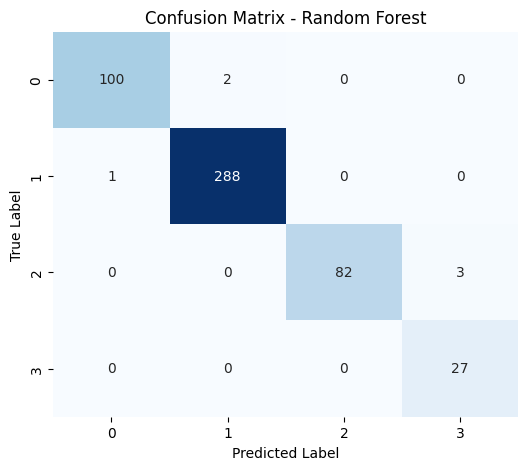

In [23]:
# Buat confusion matrix
cm = confusion_matrix(y_test, rf_pred_test)

# Visualisasikan dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### XGBoost

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Model hasil tuning
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.2,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),  # jumlah kelas
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Membuat model
xgb_model.fit(X_train, y_train)

# Prediksi
xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_test = xgb_model.predict(X_test)

# Evaluasi data training
xgb_train_acc_tuning = accuracy_score(y_train, xgb_pred_train)
xgb_train_f1_tuning = f1_score(y_train, xgb_pred_train, average='weighted')
xgb_train_precision_tuning = precision_score(y_train, xgb_pred_train, average='weighted')
xgb_train_recall_tuning = recall_score(y_train, xgb_pred_train, average='weighted')

# Evaluasi data testing
xgb_test_acc_tuning = accuracy_score(y_test, xgb_pred_test)
xgb_test_f1_tuning = f1_score(y_test, xgb_pred_test, average='weighted')
xgb_test_precision_tuning = precision_score(y_test, xgb_pred_test, average='weighted')
xgb_test_recall_tuning = recall_score(y_test, xgb_pred_test, average='weighted')

# Hasil
print("XGBoost - TEST Classification Report")
print(classification_report(y_test, xgb_pred_test))

print("\nXGBoost - TRAIN Evaluation")
print(f"Accuracy     : {xgb_train_acc_tuning:.4f}")
print(f"F1-Score     : {xgb_train_f1_tuning:.4f}")
print(f"Precision    : {xgb_train_precision_tuning:.4f}")
print(f"Recall       : {xgb_train_recall_tuning:.4f}")

print("\nXGBoost - TEST Evaluation")
print(f"Accuracy     : {xgb_test_acc_tuning:.4f}")
print(f"F1-Score     : {xgb_test_f1_tuning:.4f}")
print(f"Precision    : {xgb_test_precision_tuning:.4f}")
print(f"Recall       : {xgb_test_recall_tuning:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:46:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - TEST Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       102
           1       0.99      1.00      1.00       289
           2       1.00      0.98      0.99        85
           3       0.93      1.00      0.96        27

    accuracy                           0.99       503
   macro avg       0.98      0.99      0.98       503
weighted avg       0.99      0.99      0.99       503


XGBoost - TRAIN Evaluation
Accuracy     : 1.0000
F1-Score     : 1.0000
Precision    : 1.0000
Recall       : 1.0000

XGBoost - TEST Evaluation
Accuracy     : 0.9920
F1-Score     : 0.9921
Precision    : 0.9923
Recall       : 0.9920


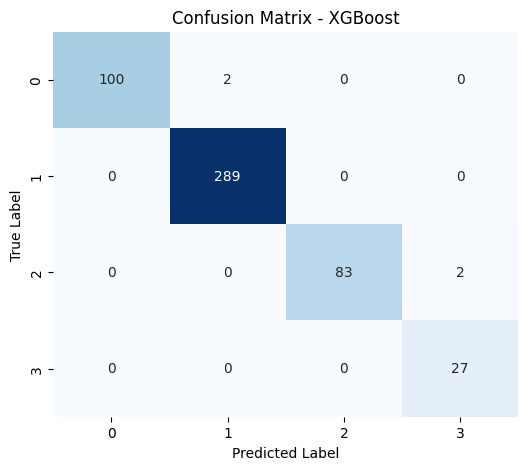

In [25]:
# Buat confusion matrix
cm = confusion_matrix(y_test, xgb_pred_test)

# Visualisasikan dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
# Buat dictionary hasil evaluasi
eval_data = {
    "Model": ["Random Forest", "Random Forest", "XGBoost", "XGBoost"],
    "Status": ["Sebelum Tuning", "Sesudah Tuning", "Sebelum Tuning", "Sesudah Tuning"],
    "Train Accuracy": [rf_train_acc, rf_train_acc_tuning, xgb_train_acc, xgb_train_acc_tuning],
    "Train F1-Score": [rf_train_f1, rf_train_f1_tuning, xgb_train_f1, xgb_train_f1_tuning],
    "Train Precision": [rf_train_precision, rf_train_precision_tuning, xgb_train_precision, xgb_train_precision_tuning],
    "Train Recall": [rf_train_recall, rf_train_recall_tuning, xgb_train_recall, xgb_train_recall_tuning],
    "Test Accuracy": [rf_test_acc, rf_test_acc_tuning, xgb_test_acc, xgb_test_acc_tuning],
    "Test F1-Score": [rf_test_f1, rf_test_f1_tuning, xgb_test_f1, xgb_test_f1_tuning],
    "Test Precision": [rf_test_precision, rf_test_precision_tuning, xgb_test_precision, xgb_test_precision_tuning],
    "Test Recall": [rf_test_recall, rf_test_recall_tuning, xgb_test_recall, xgb_test_recall_tuning],
}

# Konversi ke DataFrame
eval_df = pd.DataFrame(eval_data)

# Tampilkan DataFrame
pd.set_option('display.precision', 4)
display(eval_df)

,Model,Status,Train Accuracy,Train F1-Score,Train Precision,Train Recall,Test Accuracy,Test F1-Score,Test Precision,Test Recall
0,Random Forest,Sebelum Tuning,1.0000,1.0000,1.0000,1.0000,0.9881,0.9880,0.9881,0.9881
1,Random Forest,Sesudah Tuning,0.9995,0.9995,0.9995,0.9995,0.9881,0.9882,0.9887,0.9881
2,XGBoost,Sebelum Tuning,1.0000,1.0000,1.0000,1.0000,0.9920,0.9921,0.9923,0.9920
3,XGBoost,Sesudah Tuning,1.0000,1.0000,1.0000,1.0000,0.9920,0.9921,0.9923,0.9920


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### 1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan)

RF: Tuning memberikan peningkatan precision dan f1-score yang sangat kecil (<0.1%) — bisa dikatakan tidak signifikan secara praktis.

XGB: Tidak ada perubahan karena performa awal sudah optimal.

### 2. Identifikasi kelemahan model

- Kelas Minoritas
RF & XGB sama-sama menunjukkan performa yang sedikit lebih rendah pada label (cluster) 3:

RF: precision 0.90 → recall 1.00 (setelah tuning)

XGB: precision 0.93 → recall 1.00

Ini menunjukkan bahwa label (cluster) 3 memiliki jumlah data kecil sehingga model tidak terlalu percaya diri (precision rendah), tapi cukup sensitif menangkapnya (recall tinggi).

- Overfitting
Train accuracy = 100% untuk kedua model.

Tapi karena test accuracy juga tinggi dan stabil, maka overfitting belum parah.

### 3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

- Cek Distribusi Label
  Karena label (cluster) 3 jumlahnya sangat kecil, pertimbangkan untuk menyeimbangkan data:
  - Gunakan SMOTE atau oversampling manual.
  - Bisa juga ubah menjadi binary classification jika konteksnya memungkinkan.
- Feature Selection / Importance
- Uji Coba di Data Nyata